In [16]:
import importlib
from library import data_preprocess as dp
import matplotlib.pyplot as plt
importlib.reload(dp)
import pickle

In [17]:
file_path1 = "./data/shortjokes.csv"
file_path2 = "./data/crowdtruth_humorous_oneliners.pickle"

In [18]:
#file_path1 = dp.download_data('https://github.com/amoudgl/short-jokes-dataset/raw/master/shortjokes.csv')

In [46]:
jokes1 = dp.load_data(file_path1, header=True, sep=',')
jokes1 = list(jokes1['Joke'].values)
with open(file_path2, 'rb') as pickleFile:
    jokes2 = pickle.load(pickleFile)
jokes = jokes1
jokes.extend(jokes2)
jokes = list(set(jokes))
print(len(jokes))
print(jokes[:10])

236188
['What did the duck say to the cashier after she purchased some lipstick? "Just put it on my bill"', 'Right now the parents of the kid who climbed Trump Tower are thinking "Damn I knew we shouldn\'t have given him that REI gift card"', "I don't know why this bottle of whiskey tastes so good, but I'm going to get to the bottom of it.", "How do you find Illuminati's secret hideout? You triangulate their position!", "What is a pirate's least favorite letter? Dear Sir/Ma'am We are cutting your internet connection due to the following reasons: Illegal Downloading", 'I was told to put two planks together I totally nailed it.', "Hey!! pssst! Guys who wear camo to bars: There is a reason you're not getting laid...it's because the women can't see you..", "Hell yeah I'm a catholic i've been addicted to cats my whole life", "Are your parents retarded? ...because you're one special lady!", "Apparently there are midget prostitutes in Thailand who cost less than a dollar. Clearly they're sell

In [47]:
unique_chars = dp.get_unique_chars(jokes)
print(len(unique_chars))
print(unique_chars)

97
['\x08', '\x10', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~']


In [48]:
dp.get_char_presence(jokes)

Number of sentences containing each char is,
{'\x08': 1, '\x10': 1, ' ': 236156, '!': 27624, '"': 32651, '#': 724, '$': 1396, '%': 1163, '&': 3672, "'": 105698, '(': 4658, ')': 5135, '*': 8101, '+': 292, ',': 66731, '-': 20366, '.': 169777, '/': 3288, '0': 9591, '1': 11267, '2': 8890, '3': 5772, '4': 4280, '5': 5417, '6': 3432, '7': 2851, '8': 2981, '9': 4051, ':': 23178, ';': 2042, '<': 52, '=': 410, '>': 42, '?': 108901, '@': 140, 'A': 52374, 'B': 34734, 'C': 27474, 'D': 30457, 'E': 18093, 'F': 17364, 'G': 17779, 'H': 43970, 'I': 103194, 'J': 14563, 'K': 9602, 'L': 15412, 'M': 39035, 'N': 24267, 'O': 20739, 'P': 21032, 'Q': 3680, 'R': 16852, 'S': 42948, 'T': 58761, 'U': 8535, 'V': 5432, 'W': 92981, 'X': 923, 'Y': 19690, 'Z': 1049, '[': 5614, '\\': 81, ']': 5615, '^': 402, '_': 388, '`': 63, 'a': 233012, 'b': 148980, 'c': 184657, 'd': 212782, 'e': 234461, 'f': 155001, 'g': 170403, 'h': 224768, 'i': 228984, 'j': 33245, 'k': 139581, 'l': 207647, 'm': 180214, 'n': 227758, 'o': 232729, 'p

In [49]:
print("Total number of jokes = ", len(jokes))
filter_jokes = dp.filter_data(jokes, "^[a-zA-Z !\"',.?\-\:\*]+$")
print(len(filter_jokes))
print(filter_jokes[:10])

Total number of jokes =  236188
194026
['What did the duck say to the cashier after she purchased some lipstick? "Just put it on my bill"', 'Right now the parents of the kid who climbed Trump Tower are thinking "Damn I knew we shouldn\'t have given him that REI gift card"', "I don't know why this bottle of whiskey tastes so good, but I'm going to get to the bottom of it.", "How do you find Illuminati's secret hideout? You triangulate their position!", 'I was told to put two planks together I totally nailed it.', "Hey!! pssst! Guys who wear camo to bars: There is a reason you're not getting laid...it's because the women can't see you..", "Hell yeah I'm a catholic i've been addicted to cats my whole life", "Are your parents retarded? ...because you're one special lady!", "Apparently there are midget prostitutes in Thailand who cost less than a dollar. Clearly they're selling themselves short.", "Have you seen www.yawn.com? Yes but I'm a bit tired of it."]


In [50]:
special_chars = [' ', '!', '"', "'", '*', ',', '-', '.', ':', '?']
clean_jokes = dp.clean_data(jokes, "^[a-zA-Z !\"'*,\-.:?]+$", special_chars)

unique_chars = dp.get_unique_chars(clean_jokes)
print(len(unique_chars))
print(unique_chars)

clean_jokes = dp.tokenize(clean_jokes)

print(len(clean_jokes))
print(clean_jokes[:2])

# stats of number of tokens in the sentence
dp.get_len_stats(clean_jokes)

36
[' ', '!', '"', "'", '*', ',', '-', '.', ':', '?', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
194026
[['what', 'did', 'the', 'duck', 'say', 'to', 'the', 'cashier', 'after', 'she', 'purchased', 'some', 'lipstick', '?', '"', 'just', 'put', 'it', 'on', 'my', 'bill', '"'], ['right', 'now', 'the', 'parents', 'of', 'the', 'kid', 'who', 'climbed', 'trump', 'tower', 'are', 'thinking', '"', 'damn', 'i', 'knew', 'we', 'shouldn', "'", 't', 'have', 'given', 'him', 'that', 'rei', 'gift', 'card', '"']]
min of length:  1
max of length:  107
average length:  21.01862121571336
mode of length:  16


In [51]:
MIN_NUM_TOKENS = 6
MAX_NUM_TOKENS = 40
clean_jokes = dp.filter_data_on_length(clean_jokes, MIN_NUM_TOKENS, MAX_NUM_TOKENS)
print(len(clean_jokes))

187374


In [52]:
word_freqs = dp.get_vocabulary(clean_jokes)

In [53]:
dp.get_vocabulary_stats(word_freqs)

Total vocabulary:  54014
average of frequency:  70.57488799200208
mode of frequency:  1


In [54]:
filtered_words = dp.filter_words(word_freqs, 20)
print("Number of filtered words = ", len(filtered_words))
sents = dp.get_sentences_with_words(clean_jokes, filtered_words)
print(len(sents))
print(sents[:5])

Number of filtered words =  8203
94145
[['what', 'did', 'the', 'duck', 'say', 'to', 'the', 'cashier', 'after', 'she', 'purchased', 'some', 'lipstick', '?', '"', 'just', 'put', 'it', 'on', 'my', 'bill', '"'], ['i', 'don', "'", 't', 'know', 'why', 'this', 'bottle', 'of', 'whiskey', 'tastes', 'so', 'good', ',', 'but', 'i', "'", 'm', 'going', 'to', 'get', 'to', 'the', 'bottom', 'of', 'it', '.'], ['hell', 'yeah', 'i', "'", 'm', 'a', 'catholic', 'i', "'", 've', 'been', 'addicted', 'to', 'cats', 'my', 'whole', 'life'], ['are', 'your', 'parents', 'retarded', '?', 'threedots', 'because', 'you', "'", 're', 'one', 'special', 'lady', '!'], ['apparently', 'there', 'are', 'midget', 'prostitutes', 'in', 'thailand', 'who', 'cost', 'less', 'than', 'a', 'dollar', '.', 'clearly', 'they', "'", 're', 'selling', 'themselves', 'short', '.']]


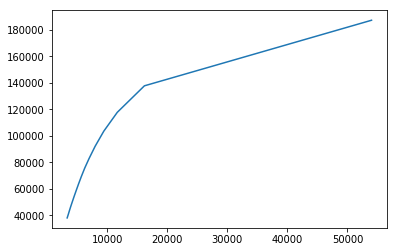

In [55]:
# Analysis for choosing optimum word freq cut off
freqsL = list(range(1, 80, 5))
num_words = []
num_sents = []
for x in freqsL:
    filtered_words = dp.filter_words(word_freqs, x)
    num_words.append(len(filtered_words))
    num_sents.append(len(dp.get_sentences_with_words(clean_jokes, filtered_words)))
plt.plot(num_words, num_sents)
plt.show()

In [67]:
# Considering only words which have a frequency of atleast 15 and the corresponding sentences
final_vocabulary = dp.filter_words(word_freqs, 15)
print("Number of filtered words = ", len(final_vocabulary))
final_clean_jokes = dp.get_sentences_with_words(clean_jokes, final_vocabulary)
print("Number of sentences: ", len(final_clean_jokes))

Number of filtered words =  9750
Number of sentences:  105850


In [68]:
# Let's append sos and eos tokens to all sentences
clean_jokes_final = [["sos"] + tokens + ["eos"] for tokens in final_clean_jokes]
clean_jokes_final = [' '.join(tokens) for tokens in clean_jokes_final]
vocabulary_final = final_vocabulary + ["sos", "eos"]
print("Final vocabulary size: ", len(vocabulary_final))
print("Number of sentences: ", len(clean_jokes_final))
print(clean_jokes_final[:2])
print(vocabulary_final[:10])

Final vocabulary size:  9752
Number of sentences:  105850
['sos what did the duck say to the cashier after she purchased some lipstick ? " just put it on my bill " eos', "sos i don ' t know why this bottle of whiskey tastes so good , but i ' m going to get to the bottom of it . eos"]
['what', 'did', 'the', 'duck', 'say', 'to', 'cashier', 'after', 'she', 'purchased']


In [69]:
with open("./datasets/jokes.pickle","wb") as fop:
    pickle.dump(clean_jokes_final, fop)
    
with open("./datasets/jokes_vocabulary.pickle","wb") as fop:
    pickle.dump(vocabulary_final, fop)

In [70]:
print(clean_jokes_final[:5])

['sos what did the duck say to the cashier after she purchased some lipstick ? " just put it on my bill " eos', "sos i don ' t know why this bottle of whiskey tastes so good , but i ' m going to get to the bottom of it . eos", "sos hell yeah i ' m a catholic i ' ve been addicted to cats my whole life eos", "sos are your parents retarded ? threedots because you ' re one special lady ! eos", "sos apparently there are midget prostitutes in thailand who cost less than a dollar . clearly they ' re selling themselves short . eos"]
